In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [43]:
data = pd.read_csv("/Users/sonn/Sonn/Workspace/Projects/IonBatteryQML/data/MaterialsProject/All_MaterialsProjectIonBattery.csv")

In [44]:
data.head(5)

,battery_id,id_charge,id_discharge,battery_formula,framework_formula,formula_discharge,formula_charge,working_ion,V_avg,capacity_grav,capacity_vol,energy_grav,energy_vol,max_delta_volume,stability_charge,stability_discharge
0,mp-28_Li,mp-28,mp-1185231,Li0-3Ce,Ce,Li3Ce,Ce,Li,-0.444846,499.595769,1295.168213,-222.242937,-576.149771,3.042358,0.000000,0.333634
1,mp-573471_Li,mp-573471,mp-1198729,Li4.25-4.4Sn,Sn,Li22Sn5,Li17Sn4,Li,-0.840299,26.936090,69.584747,-22.634379,-58.472018,0.009450,0.000000,0.010070
2,mp-80_Li,mp-80,mp-7955,Li0-3Sb,Sb,Li3Sb,Sb,Li,1.099595,563.913254,1701.062460,620.075950,1870.479038,1.863614,0.290332,0.000000
3,mp-124_Li,mp-124,mp-865875,Li0-3Ag,Ag,Li3Ag,Ag,Li,0.163836,624.785871,2033.553086,102.362464,333.169353,2.798380,0.002127,0.000000
4,mp-568806_Li,mp-568806,mp-1001581,Li0-0.17C,C,LiC6,C,Li,0.288598,339.236925,759.114650,97.903078,219.078926,0.052252,0.007597,0.000490


In [45]:
labels = data["working_ion"]
X = data.drop(columns=["battery_id","working_ion", "id_charge", "id_discharge", "battery_formula", "framework_formula", "formula_discharge", "formula_charge"])

In [46]:
labels

0       Li
1       Li
2       Li
3       Li
4       Li
        ..
5546    Zn
5547    Zn
5548    Zn
5549    Zn
5550    Zn
Name: working_ion, Length: 5551, dtype: object

In [47]:
X

,V_avg,capacity_grav,capacity_vol,energy_grav,energy_vol,max_delta_volume,stability_charge,stability_discharge
0,-0.444846,499.595769,1295.168213,-222.242937,-576.149771,3.042358,0.000000,0.333634
1,-0.840299,26.936090,69.584747,-22.634379,-58.472018,0.009450,0.000000,0.010070
2,1.099595,563.913254,1701.062460,620.075950,1870.479038,1.863614,0.290332,0.000000
3,0.163836,624.785871,2033.553086,102.362464,333.169353,2.798380,0.002127,0.000000
4,0.288598,339.236925,759.114650,97.903078,219.078926,0.052252,0.007597,0.000490
...,...,...,...,...,...,...,...,...
5546,-1.053812,133.451871,560.124895,-140.633134,-590.266131,0.001739,0.150060,0.016644
5547,-1.789513,134.405001,545.759340,-240.519466,-976.643311,0.040957,0.112425,0.022581
5548,-2.300252,93.138946,647.609652,-214.243011,-1489.665148,0.020567,0.312018,0.184538
5549,2.123828,133.451871,560.124968,283.428826,1189.609112,0.008900,4.552865,3.591904


In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

2D-PCA

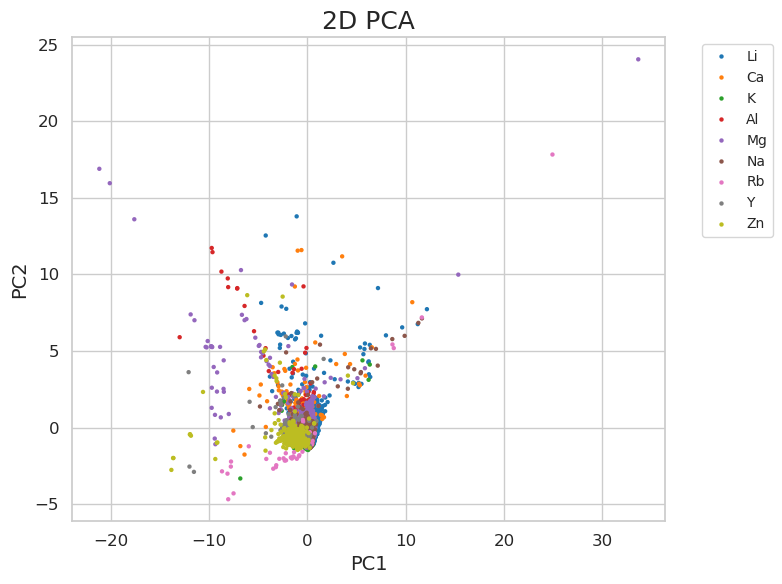

In [49]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=labels, palette='tab10', s=10, linewidth=0)
plt.title('2D PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

3D-PCA

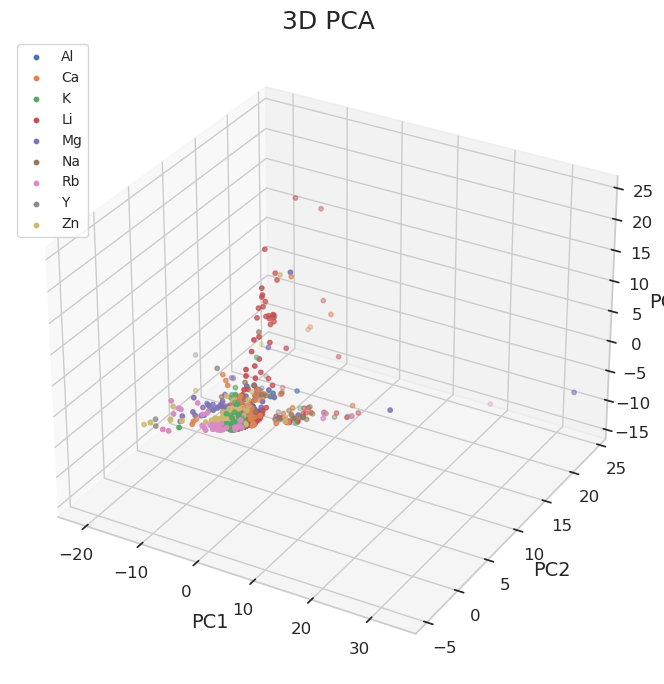

In [50]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for label in np.unique(labels):
    idx = np.array(labels) == label
    ax.scatter(X_pca_3d[idx, 0], X_pca_3d[idx, 1], X_pca_3d[idx, 2], label=label, s=10)
ax.set_title("3D PCA")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend(loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

t-SNE

/Users/sonn/anaconda3/envs/WSAIPytorch3.11/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



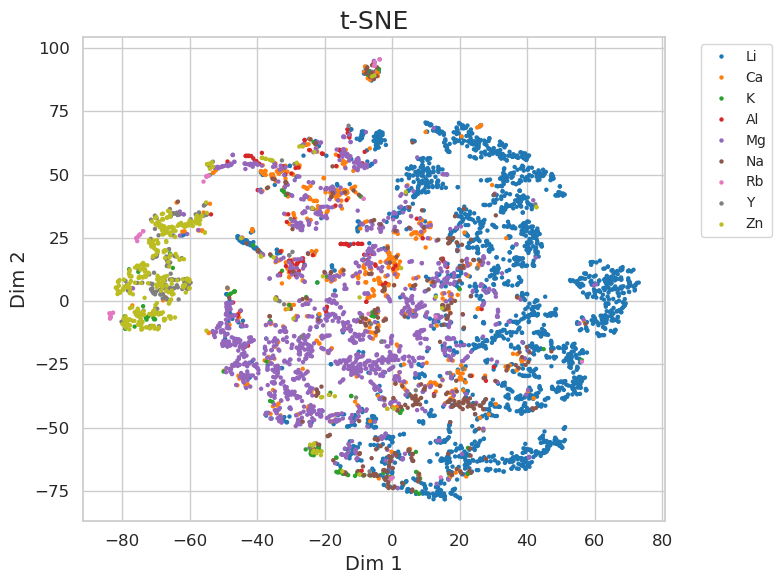

In [51]:
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette='tab10', s=10, linewidth=0)
plt.title('t-SNE')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()

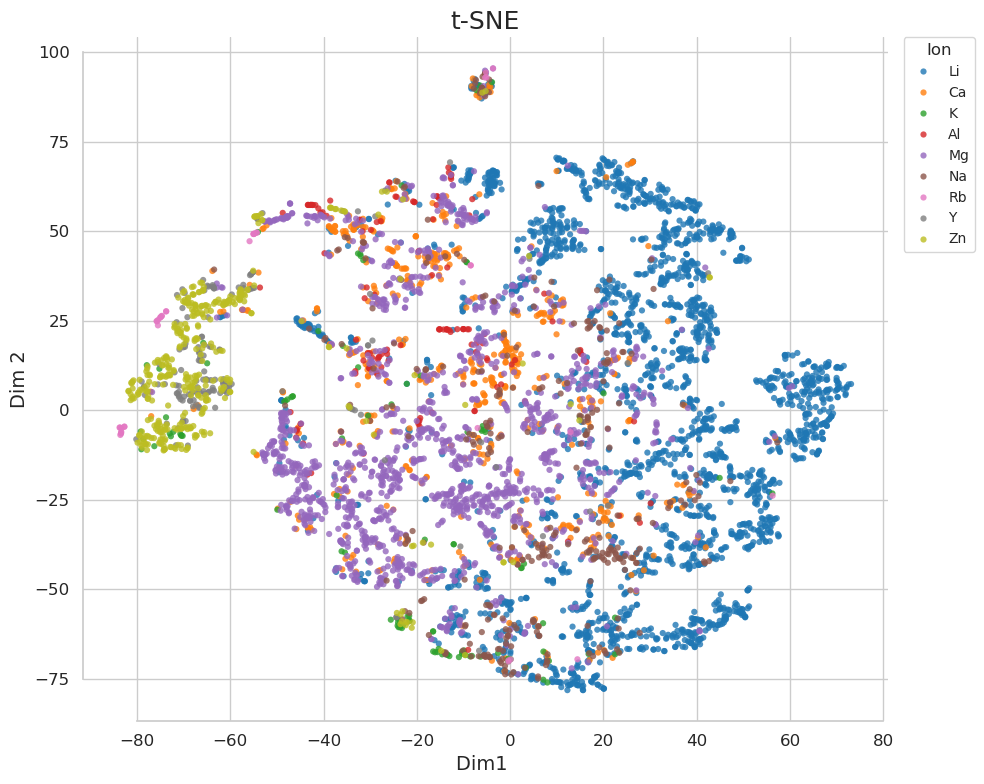

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

sns.set(style="whitegrid")
plt.rcParams.update({
    'font.family': 'DejaVu Sans',
    'figure.figsize': (10, 8),
    'axes.titlesize': 18,
    'axes.labelsize': 14,
    'legend.fontsize': 10,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

fig, ax = plt.subplots()

palette = sns.color_palette("tab10", n_colors=len(set(labels)))

sns.scatterplot(
    x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels,
    palette=palette, s=20, alpha=0.8, edgecolor='none', linewidth=0, ax=ax
)

ax.set_title('t-SNE', fontsize=18)
ax.set_xlabel('Dim1 ', fontsize=14)
ax.set_ylabel('Dim 2', fontsize=14)
ax.legend(title='Ion', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.)
sns.despine(trim=True)
plt.tight_layout()
plt.show()


In [53]:
import plotly.express as px
import pandas as pd

df_tsne = pd.DataFrame(X_tsne, columns=["Dim 1", "Dim 2"])
df_tsne["Label"] = labels

fig = px.scatter(df_tsne, x="Dim 1", y="Dim 2", color="Label",
                 title="t-SNE",
                 width=900, height=700,
                 template='plotly_white')
fig.show()


AutoEncoder

In [87]:
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

In [88]:
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_dim = X.shape[1] 
latent_dim = 2 

input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)
latent = Dense(latent_dim, activation='linear', name="latent")(encoded)

decoded = Dense(16, activation='relu')(latent)
decoded = Dense(32, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
encoder = Model(inputs=input_layer, outputs=latent)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_split=0.1, verbose=1)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1911 - val_loss: 1.4812
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1533 - val_loss: 1.3676
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0651 - val_loss: 1.2642
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - loss: 1.1107 - val_loss: 1.2089
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - loss: 0.9081 - val_loss: 1.1715
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 0.7767 - val_loss: 1.1492
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 0.7134 - val_loss: 1.1424
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 0.8742 - val_loss: 1.1154
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 0.8451 - val_loss: 1.1061
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - loss: 0.8856 - val_loss: 1.1034
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 0.8484 - val_loss: 1.1016
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - los

174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step


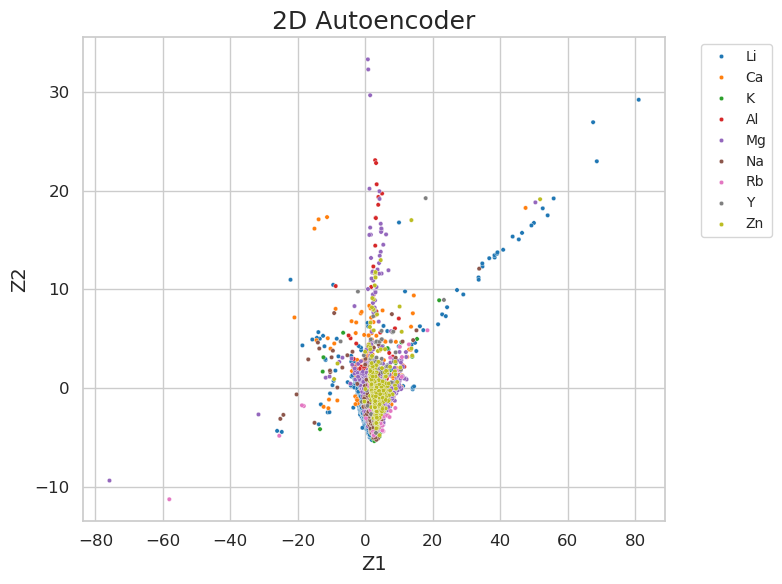

In [91]:

X_latent = encoder.predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_latent[:, 0], y=X_latent[:, 1], hue=labels, palette='tab10', s=10)
plt.title("2D Autoencoder")
plt.xlabel("Z1")
plt.ylabel("Z2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
